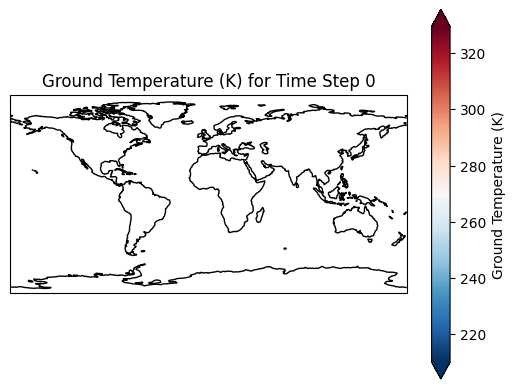

In [2]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Specify the directory and filename separately
directory = "/home/jguo/projects/cesm/archive/case/lnd/hist/"
filename = "i.e21.I2000Clm50SpGs.f09_g17.keerZemail.002.clm2.h2.2000-12-14-00000.nc"

# Construct the full path by joining the directory and filename
nc_path = os.path.join(directory, filename)

# Load the NetCDF file into an xarray Dataset
ds = xr.open_dataset(nc_path)

# Extract the variable "TG"
tg = ds['TG']

# Calculate the global minimum and maximum values across all time steps
vmin = tg.min()
vmax = tg.max()

# Set up the figure for the animation
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()  # add coastlines

im = None
cbar = None

def update(num):
    global im, cbar
    ax.clear()
    ax.coastlines()  # restore coastlines after clearing
    ax.set_title(f"Ground Temperature (K) for Time Step {num}")

    if im is None:  # only set up once
        im = ax.imshow(tg.isel(time=num).values, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=vmin, vmax=vmax, origin='upper')
        cbar = fig.colorbar(im, ax=ax, orientation='vertical', extend='both')
        cbar.set_label('Ground Temperature (K)')
    else:
        im.set_data(tg.isel(time=num).values)

# Create an animation by repeatedly calling the update function
ani = FuncAnimation(fig, update, frames=24, repeat=False)

# Display the animation in the notebook
HTML(ani.to_jshtml())
